# Reading the data set

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip3 install pyspark
import pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 44 kB/s 
     |████████████████████████████████| 199 kB 64.1 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=16bb82800740944d4ddeb62749def832d03f53928d7bd8618925ca05954417b0
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [113]:
import os
import pyspark
conf = pyspark.SparkConf()

In [101]:
spark = pyspark.sql.SparkSession.builder\
        .master('local[*]')\
        .appName('vikram_finalProject final')\
        .config("spark.some.config.option", "some-value") \
        .getOrCreate()

In [115]:
spark = pyspark.SQLContext.getOrCreate(sc)
sc.setLogLevel("ERROR")
from pyspark.sql.functions import *

In [ ]:
from pyspark.sql.functions import sum, col, desc
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, col, desc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [448]:
df = spark.read.option("header",True).option("inferSchema" , "true").csv("drive/MyDrive/Big Data Project/Dataset/international_matches.csv" )

df.printSchema()

root
 |-- date: timestamp (nullable = true)
 |-- home_team: string (nullable = true)
 |-- away_team: string (nullable = true)
 |-- home_team_continent: string (nullable = true)
 |-- away_team_continent: string (nullable = true)
 |-- home_team_fifa_rank: integer (nullable = true)
 |-- away_team_fifa_rank: integer (nullable = true)
 |-- home_team_total_fifa_points: integer (nullable = true)
 |-- away_team_total_fifa_points: integer (nullable = true)
 |-- home_team_score: integer (nullable = true)
 |-- away_team_score: integer (nullable = true)
 |-- tournament: string (nullable = true)
 |-- city: string (nullable = true)
 |-- country: string (nullable = true)
 |-- neutral_location: boolean (nullable = true)
 |-- shoot_out: string (nullable = true)
 |-- home_team_result: string (nullable = true)
 |-- home_team_goalkeeper_score: double (nullable = true)
 |-- away_team_goalkeeper_score: double (nullable = true)
 |-- home_team_mean_defense_score: double (nullable = true)
 |-- home_team_mean_o

# schema details, Data types and table description

In [449]:
df.columns

['date',
 'home_team',
 'away_team',
 'home_team_continent',
 'away_team_continent',
 'home_team_fifa_rank',
 'away_team_fifa_rank',
 'home_team_total_fifa_points',
 'away_team_total_fifa_points',
 'home_team_score',
 'away_team_score',
 'tournament',
 'city',
 'country',
 'neutral_location',
 'shoot_out',
 'home_team_result',
 'home_team_goalkeeper_score',
 'away_team_goalkeeper_score',
 'home_team_mean_defense_score',
 'home_team_mean_offense_score',
 'home_team_mean_midfield_score',
 'away_team_mean_defense_score',
 'away_team_mean_offense_score',
 'away_team_mean_midfield_score']

In [450]:
df.show()

+-------------------+-------------+------------+-------------------+-------------------+-------------------+-------------------+---------------------------+---------------------------+---------------+---------------+--------------------+------------+-------------+----------------+---------+----------------+--------------------------+--------------------------+----------------------------+----------------------------+-----------------------------+----------------------------+----------------------------+-----------------------------+
|               date|    home_team|   away_team|home_team_continent|away_team_continent|home_team_fifa_rank|away_team_fifa_rank|home_team_total_fifa_points|away_team_total_fifa_points|home_team_score|away_team_score|          tournament|        city|      country|neutral_location|shoot_out|home_team_result|home_team_goalkeeper_score|away_team_goalkeeper_score|home_team_mean_defense_score|home_team_mean_offense_score|home_team_mean_midfield_score|away_team_m

In [453]:
df.dtypes

[('date', 'timestamp'),
 ('home_team', 'string'),
 ('away_team', 'string'),
 ('home_team_continent', 'string'),
 ('away_team_continent', 'string'),
 ('home_team_fifa_rank', 'int'),
 ('away_team_fifa_rank', 'int'),
 ('home_team_total_fifa_points', 'int'),
 ('away_team_total_fifa_points', 'int'),
 ('home_team_score', 'int'),
 ('away_team_score', 'int'),
 ('tournament', 'string'),
 ('city', 'string'),
 ('country', 'string'),
 ('neutral_location', 'boolean'),
 ('shoot_out', 'string'),
 ('home_team_result', 'string'),
 ('home_team_goalkeeper_score', 'double'),
 ('away_team_goalkeeper_score', 'double'),
 ('home_team_mean_defense_score', 'double'),
 ('home_team_mean_offense_score', 'double'),
 ('home_team_mean_midfield_score', 'double'),
 ('away_team_mean_defense_score', 'double'),
 ('away_team_mean_offense_score', 'double'),
 ('away_team_mean_midfield_score', 'double')]

# EDA - Exploratory Data Analysis

## correlation Matrix

In [435]:
df = spark.read.option("header",True).option("inferSchema" , "true").csv("drive/MyDrive/Big Data Project/Dataset/training.csv", )

df.printSchema()

root
 |-- Team1: string (nullable = true)
 |-- Team2: string (nullable = true)
 |-- Team1_FIFA_RANK: integer (nullable = true)
 |-- Team2_FIFA_RANK: integer (nullable = true)
 |-- Team1_Result: integer (nullable = true)
 |-- Team1_Goalkeeper_Score: double (nullable = true)
 |-- Team2_Goalkeeper_Score: double (nullable = true)
 |-- Team1_Defense: double (nullable = true)
 |-- Team1_Offense: double (nullable = true)
 |-- Team1_Midfield: double (nullable = true)
 |-- Team2_Defense: double (nullable = true)
 |-- Team2_Offense: double (nullable = true)
 |-- Team2_Midfield: double (nullable = true)



In [436]:
df = df.select("Team1_FIFA_RANK","Team2_FIFA_RANK","Team1_Result","Team1_Goalkeeper_Score","Team2_Goalkeeper_Score","Team1_Defense","Team1_Offense","Team1_Midfield","Team2_Defense","Team2_Offense","Team2_Midfield")

In [437]:
df = df.withColumnRenamed("Team1_Result","label")
df = df.na.drop()

In [443]:
va_df = assembler.transform(df)
va_df = va_df.select(['features', 'label'])
va_df.show(3)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[59.0,22.0,1.0,67...|    1|
|[8.0,14.0,2.0,86....|    2|
|[35.0,94.0,1.0,71...|    1|
+--------------------+-----+
only showing top 3 rows



In [444]:
from pyspark.ml.stat import Correlation
from pyspark.ml.linalg import DenseMatrix, Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import *
assembler = VectorAssembler(inputCols=df.columns, 
outputCol="features",handleInvalid='keep')
df1= assembler.transform(df).select("features")
correlation = Correlation.corr(df1,"features","pearson").collect()[0][0]
print(correlation)

DenseMatrix([[ 1.        ,  0.0518981 , -0.18635504, -0.72481697, -0.08662547,
              -0.78225461, -0.78069194, -0.78185126, -0.05667924, -0.0688722 ,
              -0.05919089],
             [ 0.0518981 ,  1.        ,  0.1113663 , -0.1198363 , -0.7252247 ,
              -0.07828128, -0.09186325, -0.08387365, -0.782428  , -0.7881121 ,
              -0.78895942],
             [-0.18635504,  0.1113663 ,  1.        ,  0.12250889, -0.12483728,
               0.15884057,  0.16598054,  0.15763915, -0.1223539 , -0.11705532,
              -0.12750494],
             [-0.72481697, -0.1198363 ,  0.12250889,  1.        ,  0.21788527,
               0.85197939,  0.83216813,  0.83825268,  0.17463843,  0.17287993,
               0.17344554],
             [-0.08662547, -0.7252247 , -0.12483728,  0.21788527,  1.        ,
               0.15981704,  0.16127244,  0.15928439,  0.83639683,  0.8106077 ,
               0.81902229],
             [-0.78225461, -0.07828128,  0.15884057,  0.85197939,  0.1

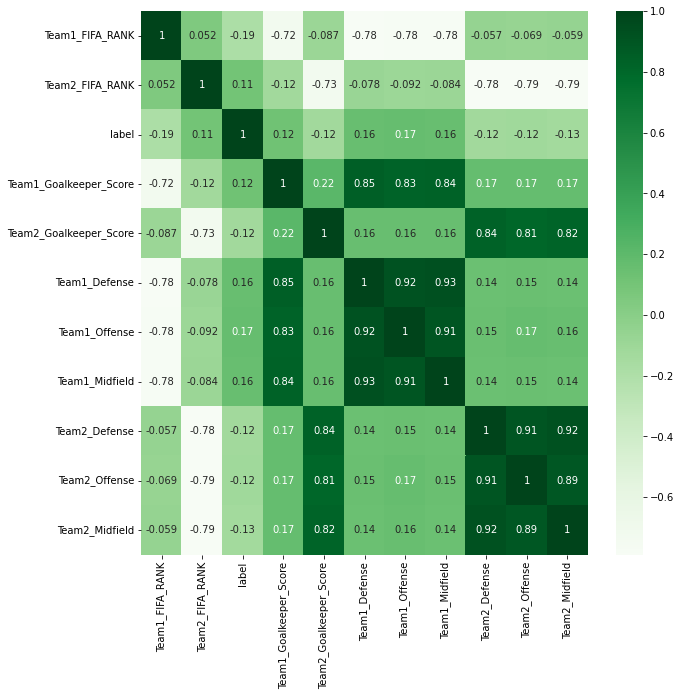

In [446]:
rows = correlation.toArray().tolist()
df2= spark.createDataFrame(rows,df.columns)
corr_matrix_df = pd.DataFrame(data=rows, columns = df.columns, index=df.columns) 
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))  
sns.heatmap(corr_matrix_df, 
            xticklabels=corr_matrix_df.columns.values,
            yticklabels=corr_matrix_df.columns.values,  cmap="Greens", annot=True)

## Top 10 Fifa teams in the last FIFA date

In [455]:
df_international = df.select('date','home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank')
df_home =df_international.select('date', 'home_team', 'home_team_fifa_rank')
df_away=df_international.select('date', 'away_team', 'away_team_fifa_rank')
df_home = df_home.withColumnRenamed('home_team','team')
df_home = df_home.withColumnRenamed('home_team_fifa_rank','rank')
df_away = df_away.withColumnRenamed('away_team','team')
df_away = df_away.withColumnRenamed('away_team_fifa_rank','team')
df_international = df_home.union(df_away)
df_international.groupBy("team")

In [456]:
df_international.show()

+-------------------+-------------+----+
|               date|         team|rank|
+-------------------+-------------+----+
|1993-08-08 00:00:00|      Bolivia|  59|
|1993-08-08 00:00:00|       Brazil|   8|
|1993-08-08 00:00:00|      Ecuador|  35|
|1993-08-08 00:00:00|       Guinea|  65|
|1993-08-08 00:00:00|     Paraguay|  67|
|1993-08-08 00:00:00|         Peru|  70|
|1993-08-08 00:00:00|     Zimbabwe|  50|
|1993-08-09 00:00:00|       Guinea|  65|
|1993-08-11 00:00:00|Faroe Islands| 111|
|1993-08-11 00:00:00|       Sweden|   4|
|1993-08-15 00:00:00|    Australia|  52|
|1993-08-15 00:00:00|      Bolivia|  59|
|1993-08-15 00:00:00|     Colombia|  19|
|1993-08-15 00:00:00|        Congo| 107|
|1993-08-15 00:00:00|      Uruguay|  22|
|1993-08-22 00:00:00|    Argentina|   5|
|1993-08-22 00:00:00|      Bolivia|  59|
|1993-08-22 00:00:00|       Brazil|   8|
|1993-08-22 00:00:00|     Paraguay|  67|
|1993-08-22 00:00:00|       Sweden|   4|
+-------------------+-------------+----+
only showing top

In [457]:
to_date(col("date"),"yyyy-mm-dd") 
df7= df_international.sort(df_international.team.asc(),df_international.date.desc(),df_international.rank.asc())
df7 = df7.select("team", "rank", year("date").alias("year")).filter(col("year")>=2022).drop("year")
df7 = df7.groupBy("team", "rank").count()
df7 = df7.sort(df7.rank.desc())

In [458]:
from pyspark.sql.window import Window
w2 = Window.partitionBy("rank").orderBy("rank")
df88 = df7.withColumn("row",row_number().over(w2)) \
  .filter(col("row") == 1).drop("row")
df88.select("team", "rank").sort("rank").show(11)

+-----------+----+
|       team|rank|
+-----------+----+
|    Belgium|   1|
|    Belgium|   2|
|     France|   3|
|  Argentina|   4|
|    England|   5|
|      Italy|   6|
|      Spain|   7|
|   Portugal|   8|
|    Denmark|   9|
|Netherlands|  10|
|    Germany|  11|
+-----------+----+
only showing top 11 rows



In [459]:
t = [row[0] for row in df88.select("team").collect()]
s = [row[0] for row in df88.select("rank").collect()]
t = t[:10]
s = s[:10]

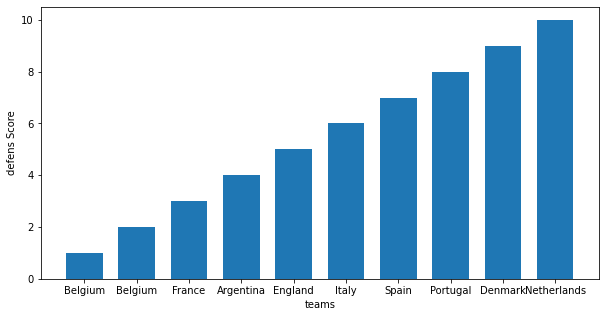

In [460]:
fig = plt.figure(figsize = (10, 5))
plt.bar(np.arange(len(t)), s, width = 0.7)
plt.xlabel("teams")
plt.ylabel("defens Score")
plt.xticks(np.arange(len(t)), t)
plt.show()

## Top 10 attacking teams in the last FIFA date

In [377]:
df = df.na.drop()

In [378]:
df_international1 = df.select('date','home_team', 'away_team', 'home_team_mean_offense_score', 'away_team_mean_offense_score')
df_home =df_international1.select('date', 'home_team', 'home_team_mean_offense_score')
df_away=df_international1.select('date', 'away_team', 'away_team_mean_offense_score')
df_home = df_home.withColumnRenamed('home_team','team')
df_home = df_home.withColumnRenamed('home_team_mean_offense_score','offense_score')
df_away = df_away.withColumnRenamed('away_team','team')
df_away = df_away.withColumnRenamed('away_team_mean_offense_score','offense_score')
df_international1 = df_home.union(df_away)
df_international1.groupBy("team")

In [379]:
df_international1.show()

+-------------------+--------------------+-------------+
|               date|                team|offense_score|
+-------------------+--------------------+-------------+
|2004-09-03 00:00:00|               Spain|         89.3|
|2004-09-04 00:00:00|             Austria|         73.0|
|2004-09-04 00:00:00|             Croatia|         78.7|
|2004-09-04 00:00:00|             Iceland|         77.0|
|2004-09-04 00:00:00|               Italy|         92.3|
|2004-09-04 00:00:00|             Morocco|         73.7|
|2004-09-04 00:00:00|    Northern Ireland|         65.7|
|2004-09-04 00:00:00|              Russia|         79.7|
|2004-09-08 00:00:00|Bosnia and Herzeg...|         74.3|
|2004-09-08 00:00:00|          Costa Rica|         72.7|
|2004-09-08 00:00:00|             Germany|         82.7|
|2004-09-08 00:00:00|              Greece|         83.7|
|2004-09-08 00:00:00|             Hungary|         75.7|
|2004-09-08 00:00:00|         Netherlands|         93.0|
|2004-09-08 00:00:00|          

In [415]:
to_date(col("date"),"yyyy-mm-dd") 
df7= df_international1.sort(df_international1.team.asc(),df_international1.date.desc(),df_international1.offense_score.desc())
df7 = df7.select("team", "offense_score", year("date").alias("year")).filter(col("year")>=2022).drop("year")
df7 = df7.groupBy("team", "offense_score").count()
df7 = df7.sort(df7.offense_score.desc())
df8 = df7.select("team", "offense_score")
df8.show(10)

+---------+-------------+
|     team|offense_score|
+---------+-------------+
|Argentina|         89.0|
|   France|         88.3|
|  England|         88.0|
|   Brazil|         86.3|
| Portugal|         86.0|
|  Belgium|         85.7|
|    Italy|         85.3|
|    Spain|         85.0|
|   Poland|         84.7|
|  Uruguay|         84.3|
+---------+-------------+
only showing top 10 rows



In [416]:
t = [row[0] for row in df8.select("team").collect()]
s = [row[0] for row in df8.select("offense_score").collect()]
t = t[:10]
s = s[:10]

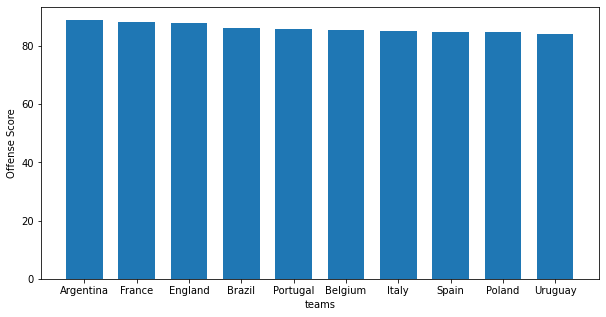

In [413]:
fig = plt.figure(figsize = (10, 5))
plt.bar(np.arange(len(t)), s, width = 0.7)
plt.xlabel("teams")
plt.ylabel("Offense Score")
plt.xticks(np.arange(len(t)), t)
plt.show()

\# 

## Top 10 defending teams in the last FIFA date

In [419]:
df_international2 = df.select('date','home_team', 'away_team', 'home_team_mean_defense_score', 'away_team_mean_defense_score')
df_home =df_international2.select('date', 'home_team', 'home_team_mean_defense_score')
df_away=df_international2.select('date', 'away_team', 'away_team_mean_defense_score')
df_home = df_home.withColumnRenamed('home_team','team')
df_home = df_home.withColumnRenamed('home_team_mean_defense_score','defense_score')
df_away = df_away.withColumnRenamed('away_team','team')
df_away = df_away.withColumnRenamed('away_team_mean_defense_score','defense_score')
df_international2 = df_home.union(df_away)
df_international2.groupBy("team")

In [421]:
df_international2.show(10)

+-------------------+--------------------+-------------+
|               date|                team|defense_score|
+-------------------+--------------------+-------------+
|2004-09-03 00:00:00|               Spain|         86.5|
|2004-09-04 00:00:00|             Austria|         76.2|
|2004-09-04 00:00:00|             Croatia|         80.5|
|2004-09-04 00:00:00|             Iceland|         68.8|
|2004-09-04 00:00:00|               Italy|         91.8|
|2004-09-04 00:00:00|             Morocco|         75.2|
|2004-09-04 00:00:00|    Northern Ireland|         71.8|
|2004-09-04 00:00:00|              Russia|         75.5|
|2004-09-08 00:00:00|Bosnia and Herzeg...|         72.2|
|2004-09-08 00:00:00|          Costa Rica|         69.5|
+-------------------+--------------------+-------------+
only showing top 10 rows



In [422]:
to_date(col("date"),"yyyy-mm-dd") 
df7= df_international2.sort(df_international2.team.asc(),df_international2.date.desc(),df_international2.defense_score.desc())
df7 = df7.select("team", "defense_score", year("date").alias("year")).filter(col("year")>=2022).drop("year")
df7 = df7.groupBy("team", "defense_score").count()
df7 = df7.sort(df7.defense_score.desc())
df8 = df7.select("team", "defense_score")
df8.show(10)

+-----------+-------------+
|       team|defense_score|
+-----------+-------------+
|      Spain|         86.5|
|Netherlands|         85.2|
|   Portugal|         85.2|
|    England|         85.0|
|     Brazil|         84.8|
|      Italy|         84.2|
|     France|         84.2|
|    Germany|         84.0|
|  Argentina|         82.2|
|    Morocco|         81.2|
+-----------+-------------+
only showing top 10 rows



In [423]:
t = [row[0] for row in df8.select("team").collect()]
s = [row[0] for row in df8.select("defense_score").collect()]
t = t[:10]
s = s[:10]

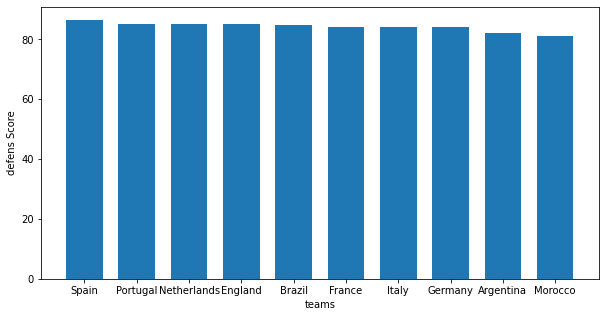

In [424]:
fig = plt.figure(figsize = (10, 5))
plt.bar(np.arange(len(t)), s, width = 0.7)
plt.xlabel("teams")
plt.ylabel("defens Score")
plt.xticks(np.arange(len(t)), t)
plt.show()

# Reading the data for machine learning models

In [430]:
import pandas as pd
import numpy as np

In [431]:
!pip3 install pyspark
import pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [432]:
spark = pyspark.sql.SparkSession.builder\
        .master('local[*]')\
        .appName('vikra_finalProject final')\
        .getOrCreate()

In [433]:
sc = spark.sparkContext
sc.setLogLevel("ERROR")
sc

<SparkContext master=local[*] appName=vikram_finalProject final>

In [434]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Machine Learning Models

## Random forest

In [440]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [441]:
va_df = assembler.transform(df)

In [442]:
va_df = va_df.select(['features', 'label'])
va_df.show(3)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[59.0,22.0,1.0,67...|    1|
|[8.0,14.0,2.0,86....|    2|
|[35.0,94.0,1.0,71...|    1|
+--------------------+-----+
only showing top 3 rows



In [ ]:
# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(va_df)

In [ ]:
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(va_df)

In [ ]:
(trainingData, testData) = va_df.randomSplit([0.8, 0.2])

In [ ]:
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", numTrees=2)

In [ ]:
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel",
                               labels=labelIndexer.labels)

In [ ]:
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, rf, labelConverter])

In [ ]:
model = pipeline.fit(trainingData)

In [ ]:
predictions = model.transform(testData)

In [ ]:
predictions.select("predictedLabel", "label", "features").show()

+--------------+-----+--------------------+
|predictedLabel|label|            features|
+--------------+-----+--------------------+
|             1|    1|[1.0,3.0,1.0,93.0...|
|             0|    0|[1.0,4.0,0.0,89.0...|
|             1|    1|[1.0,4.0,1.0,82.0...|
|             1|    1|[1.0,5.0,1.0,79.0...|
|             1|    1|[1.0,5.0,1.0,82.0...|
|             1|    1|[1.0,8.0,1.0,88.0...|
|             1|    1|[1.0,11.0,1.0,91....|
|             1|    1|[1.0,13.0,1.0,86....|
|             1|    1|[1.0,15.0,1.0,86....|
|             1|    1|[1.0,16.0,1.0,88....|
|             1|    1|[1.0,18.0,1.0,89....|
|             1|    1|[1.0,18.0,1.0,89....|
|             2|    0|[1.0,19.0,0.0,86....|
|             1|    1|[1.0,21.0,1.0,86....|
|             1|    1|[1.0,21.0,1.0,89....|
|             1|    1|[1.0,28.0,1.0,90....|
|             2|    2|[1.0,28.0,2.0,93....|
|             1|    1|[1.0,30.0,1.0,88....|
|             1|    1|[1.0,31.0,1.0,88....|
|             1|    1|[1.0,32.0,

In [ ]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy = %s" % (accuracy))
print("Test Error = %g" % (1.0 - accuracy))

Accuracy = 0.9633077765607886
Test Error = 0.0366922


## NaiveByes

In [ ]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
(trainingData, testData) = va_df.randomSplit([0.8, 0.2])

In [ ]:
splits = va_df.randomSplit([0.6, 0.4], 1234)

In [ ]:
train = splits[0]
test = splits[1]

In [ ]:
nb = NaiveBayes(smoothing=1.0, modelType="multinomial")

In [ ]:
model = nb.fit(train)

In [ ]:
result = model.transform(test)
predictionAndLabels = result.select("prediction", "label")
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
print("Accuracy: " + str(evaluator.evaluate(predictionAndLabels)))

Accuracy: 0.5967828418230563


In [ ]:
result.select("prediction", "label", "features").show()

+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       2.0|    0|[1.0,2.0,0.0,90.0...|
|       2.0|    0|[1.0,2.0,0.0,92.0...|
|       2.0|    0|[1.0,4.0,0.0,89.0...|
|       2.0|    1|[1.0,5.0,1.0,79.0...|
|       2.0|    1|[1.0,5.0,1.0,86.0...|
|       2.0|    2|[1.0,5.0,2.0,89.0...|
|       2.0|    0|[1.0,7.0,0.0,89.0...|
|       2.0|    0|[1.0,8.0,0.0,91.0...|
|       2.0|    1|[1.0,8.0,1.0,86.0...|
|       2.0|    1|[1.0,8.0,1.0,86.0...|
|       2.0|    1|[1.0,8.0,1.0,88.0...|
|       2.0|    1|[1.0,8.0,1.0,91.0...|
|       2.0|    1|[1.0,9.0,1.0,86.0...|
|       2.0|    1|[1.0,9.0,1.0,86.0...|
|       2.0|    2|[1.0,9.0,2.0,86.0...|
|       2.0|    1|[1.0,10.0,1.0,86....|
|       2.0|    1|[1.0,11.0,1.0,86....|
|       2.0|    1|[1.0,12.0,1.0,82....|
|       2.0|    1|[1.0,12.0,1.0,86....|
|       2.0|    1|[1.0,13.0,1.0,86....|
+----------+-----+--------------------+
only showing top 20 rows

